In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.tree import *
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.svm import SVC

Using TensorFlow backend.


In [18]:
df_atom=pd.read_csv('caco_AtomPair.tsv', sep='\t', index_col=False)
df_atom.head()

,Molecule,AP_FP_2,AP_FP_3,AP_FP_4,AP_FP_5,AP_FP_6,AP_FP_460,AP_FP_1700,AP_FP_480,AP_FP_8,...,AP_FP_1787,AP_FP_2233,AP_FP_1542,AP_FP_3736,AP_FP_2696,AP_FP_130,AP_FP_4243,AP_FP_4314,AP_FP_4050,AP_FP_6622
0,Compound0001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Compound0002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Compound0003,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,3,0,0
3,Compound0004,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,3,0,0
4,Compound0005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


In [15]:
df_dragon=pd.read_csv('caco_Dragon.tsv', sep='\t', index_col=False)
df_dragon.shape

(3796, 53)

In [20]:
df_quick=pd.read_csv('caco_QuickProp.tsv', sep='\t', index_col=False)
df_quick

,Molecule,QikProp_.stars,QikProp_.amine,QikProp_.amidine,QikProp_.acid,QikProp_.amide,QikProp_.rotor,QikProp_.rtvFG,QikProp_CNS,QikProp_mol_MW,...,QikProp_PSA,QikProp_.NandO,QikProp_RuleOfFive,QikProp_.ringatoms,QikProp_.in34,QikProp_.in56,QikProp_.noncon,QikProp_.nonHatm,QikProp_RuleOfThree,QikProp_ACxDN..5.SAxSASA.MW
0,Compound0001,5,0,0,1,0,1,0,-1,123.111,...,62.041,3,0,6,0,6,0,9,0,0.028430
1,Compound0002,0,0,0,0,0,5,0,-2,290.272,...,111.738,6,0,16,0,16,3,21,1,0.041983
2,Compound0003,0,2,0,1,0,5,0,-1,518.611,...,120.746,9,1,27,0,24,7,38,1,0.019764
3,Compound0004,0,2,0,1,0,5,0,-1,532.638,...,113.431,9,1,28,0,18,8,39,1,0.019244
4,Compound0005,0,2,0,1,0,4,0,-1,504.585,...,120.305,9,1,27,0,24,7,37,1,0.020314
5,Compound0006,0,2,0,1,0,4,0,-1,518.611,...,112.989,9,1,28,0,18,8,38,1,0.019764
6,Compound0007,0,2,0,1,0,5,0,-1,516.639,...,113.296,8,1,27,0,24,8,38,2,0.018388
7,Compound0008,0,2,0,1,0,5,0,-1,530.666,...,105.977,8,1,28,0,18,9,39,2,0.017902
8,Compound0009,0,2,0,1,0,4,0,-1,516.639,...,105.584,8,1,28,0,18,9,38,1,0.018388
9,Compound0010,6,1,0,1,4,18,0,-2,587.690,...,220.741,12,3,12,0,12,0,41,2,0.042805


In [17]:
df_pipe_FP=pd.read_csv('caco_PipelinePilot_FP.tsv', sep='\t', index_col=False)
df_pipe_FP.shape

(3796, 5402)

In [10]:
df_out=pd.read_csv('caco_Outcome.tsv', sep='\t', index_col=False)
df_out

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M
5,Compound0006,M
6,Compound0007,M
7,Compound0008,M
8,Compound0009,M
9,Compound0010,L


In [8]:
df_out.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [12]:
x_df=df_atom

In [13]:
#x_df.drop(x_df.columns[[1]], axis=1)
#x_df
x_df.set_index('Molecule', inplace=True)
x_df.shape

(3796, 996)

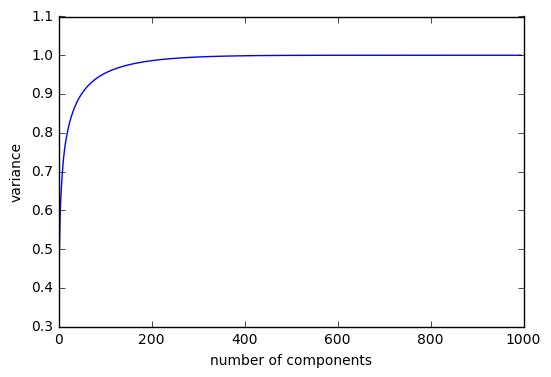

In [11]:
from sklearn.decomposition import PCA
pca=PCA().fit(x_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("variance")
plt.show()


In [12]:
pca=PCA(n_components=200)
x_pca=pca.fit_transform(x_df)

In [13]:
y_df=df_out
y_df.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [31]:
y_final=y_df.drop('Molecule', axis=1)
y_final.head()


,Class
0,M
1,L
2,M
3,M
4,M


In [15]:
x_train_df, x_test_df, y_train_df, y_test_df=train_test_split(x_pca, y_final, test_size=0.2)
#x_train_int=table.Columns.RemoveAt(0)

In [16]:
x_scaler=StandardScaler()
x_train_norm=x_scaler.fit_transform(x_train_df)
x_test_norm=x_scaler.transform(x_test_df)
x_train_norm.shape, x_test_norm.shape

((3036, 200), (760, 200))

In [17]:
y_encoder=LabelEncoder()
y_encoded_tr=y_encoder.fit_transform(y_train_df)
y_enc_tr=np_utils.to_categorical(y_encoded_tr)
y_enc_tr.shape
y_encoded_test=y_encoder.fit_transform(y_test_df)
y_enc_test=np_utils.to_categorical(y_encoded_test)
y_enc_tr.shape,y_enc_test.shape

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((3036, 3), (760, 3))

In [18]:
y_enc_tr.shape[0], y_enc_tr.shape[1]

(3036, 3)

In [19]:
y_scaler=StandardScaler()
y_train_norm=y_scaler.fit_transform(y_enc_tr)
y_test_norm=y_scaler.transform(y_enc_test)
y_train_norm.shape

(3036, 3)

**NEURAL NETWORK**

In [20]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

In [21]:
seed=7
np.random.seed(seed)

In [22]:
def baseline_model():
    model=Sequential()
    model.add(Dense(300, input_dim=200,init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(150, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(75, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, init='normal', activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(12, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, init='normal', activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
#fit and evaluate the model
estimators=[]
estimators.append(('standardise',StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, nb_epoch=100, batch_size=200, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, x_train_norm, y_train_norm, cv=kfold)
print('accuracy:', results.mean()*100)

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, input_dim=200, kernel_initializer="normal", activation="relu")`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(150, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(75, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Mini

accuracy: 46.5414927608


In [24]:
x_train_norm.shape, x_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((3036, 200), (760, 200), (3036, 3), (760, 3))

In [25]:
y_train_final, y_test_final=train_test_split(y_final, test_size=0.2)
y_train_final.shape

(3036, 1)

In [26]:
from sklearn import linear_model
clf_linear=linear_model.LogisticRegression()
model_linear=clf_linear.fit(x_train_norm, y_train_final)
acc_logit=model_linear.score(x_test_norm, y_test_final)
print('accuracy:',acc_logit)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.488157894737


In [27]:
tree_c=DecisionTreeClassifier(random_state=seed)#check this
model_c=tree_c.fit(x_train_norm, y_train_final)
acc_clf=model_c.score(x_test_norm, y_test_final)
print('accuracy:', acc_clf )

accuracy: 0.473684210526


In [28]:
export_graphviz(tree_c, out_file='tree_clf.dot', rounded=True)#visualizing the decision tree

In [29]:
clf_SGD=linear_model.SGDClassifier(loss='epsilon_insensitive', penalty='none', alpha=0.0001)
clf_SGD.fit(x_train_norm, y_train_final)
y_predict_SGD=clf_SGD.predict(x_test_norm)
acc_SGD=clf_SGD.score(x_test_norm, y_test_final)
print('accuracy of SGD:', acc_SGD)

accuracy of SGD: 0.465789473684


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from sklearn.svm import SVC
clf_svc=SVC(kernel='rbf', C=1e3)
clf_svc.fit(x_train_norm, y_train_final)
y_predict_svc=clf_svc.predict(x_test_norm)
acc_svc=clf_svc.score(x_test_norm, y_test_final)
print("accuracy of svc:", acc_svc)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of svc: 0.505263157895
